In [11]:
import numpy as np
import pandas as pd

In [12]:
#Upload data
df_housing = pd.read_csv("1553768847_housing.csv")

In [37]:
#Print first few rows of data
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [39]:
#Create a data frame
data = ['longitude', 'latitude','housing_median_age','total_rooms','total_bedrooms', 'population', 'households', 'median_income', 'ocean_promixity', 'median_house_value']
df = pd.DataFrame(data)

In [15]:
#Illustrate columns in data set 
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [44]:
#Extract x and y variables 
x = df_housing.drop('median_house_value' , axis = 1)
y = df_housing['median_house_value']

# Before extraction we have to perform label encoding(which will be taught in session) 
# on object data types - which is "ocean_proximity"

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_housing['ocean_proximity'] = le.fit_transform(df_housing['ocean_proximity'])
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [45]:
#Handle missing values by filling in total_bedrooms column
mean_value=df_housing['total_bedrooms'].mean()
df_housing['total_bedrooms'].fillna(value=mean_value, inplace=True)

In [46]:
#Check if housing mean was properly applied
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [47]:
#Convert ocean_proximity into data points 0=NearBay, 1=<1HOcean, 2=Inland, 3=NearOcean, 4=Island 
# df_housing['ocean_proximity'].replace(['Near Bay', 'Hocean', 'Inland', 'Near Ocean', 'Island'],[0,1,2,3,4], inplace=True)


# Not required
df_housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [48]:
#Check conversion
df_housing.info() #always use info to see the datatype changes and then proceed with df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int64  
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [49]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [53]:
# before splitting the data
# extract features as show below
x = df_housing.drop(['median_house_value'],axis=1) # dropping target from X
y = df_housing['median_house_value']

In [54]:
#Split the data into 80% training data set and 20% data set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.80, random_state=0)

In [62]:
#Standardized of dependent variables

from sklearn.preprocessing import MinMaxScaler
ms_x=MinMaxScaler()

In [63]:
x_train_sc = pd.DataFrame(data = ms.fit_transform(x_train), columns = x_train.columns)
x_test_sc = pd.DataFrame(data = ms.transform(x_test), columns = x_test.columns)

In [64]:
x_train_sc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.224615,0.552432,0.60,0.099087,0.160469,0.056718,0.144094,0.176867,0.75
1,0.673846,0.158919,0.80,0.064229,0.074369,0.040513,0.070913,0.175004,0.25
2,0.209231,0.569730,0.98,0.030357,0.061046,0.014102,0.050505,0.054158,0.75
3,0.622564,0.152432,0.84,0.089888,0.141380,0.082651,0.144094,0.151391,0.00
4,0.627692,0.134054,0.80,0.075202,0.122688,0.058876,0.114822,0.107447,1.00
...,...,...,...,...,...,...,...,...,...
4123,0.311795,0.617297,0.36,0.042775,0.044741,0.019569,0.044321,0.269831,0.25
4124,0.349744,0.531892,0.50,0.036336,0.037980,0.017747,0.042259,0.166453,0.25
4125,0.246154,0.434595,0.58,0.046619,0.106158,0.019345,0.080190,0.186053,1.00
4126,0.653333,0.114595,0.64,0.069420,0.098230,0.029102,0.095650,0.353899,0.00


In [69]:
ms_y = MinMaxScaler()

y_train_sc = ms_y.fit_transform(y_train.values.reshape(-1,1))
y_test_sc = ms_y.transform(y_test.values.reshape(-1,1))

In [72]:
#Perform linear regression 
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

lr.fit(x_train_sc, y_train_sc)

LinearRegression()

In [78]:
pred = lr.predict(x_test_sc)

In [79]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [84]:
pred_inverse_scaled = ms_y.inverse_transform(pred)

In [87]:
#Print RMSE
print(np.sqrt(mean_squared_error(pred , y_test)))

236988.82471772726


In [89]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y,x)
results =model.fit()

In [90]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:10:01   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20630   BIC:                         5.190e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.568e+06   6.55

In [101]:
#Extract median income and run regression with just that 
lr1 = LinearRegression()
lr1.fit(x_train_sc['median_income'].values.reshape(-1,1), y_train_sc)

LinearRegression()

In [103]:
pred_1 = lr1.predict(x_test_sc['median_income'].values.reshape(-1,1))

In [104]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'predicted_y')

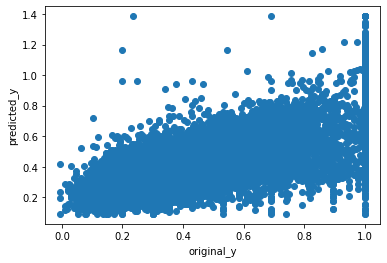

In [107]:
plt.scatter(y_test_sc, pred_1)
plt.xlabel('original_y')
plt.ylabel('predicted_y')